## Stroke Prediction Dataset

About Dataset
Similar Datasets


Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

1- Data Exploration

2- Exploratory Data Analysis (EDA)

3- Data Pre-processing

4- Data Manipulation

5- Feature Selection/Extraction

6- Predictive Modelling

7- Project Outcomes & Conclusion 

## 1- Data Exploration

In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_stroke =  pd.read_csv('C:\desarrollo\proyectos\datasets\stroke_brain\data_stroke_brain.csv')

#df_stroke.drop(['CustomerID'], axis=1, inplace=True)
#I remove the autoincremental values from the dataset. I use the natural index

print(df_stroke.columns)
print(f'Tamaño dataset : {df_stroke.shape}')
df_stroke.head(5)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Tamaño dataset : (4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df_stroke.loc[:,['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [170]:
# Count of each class 
print('count for each class')
print(df_stroke['stroke'].value_counts())
print('% for each class')
print(df_stroke['stroke'].value_counts() / df_stroke['stroke'].count())



count for each class
0    4733
1     248
Name: stroke, dtype: int64
% for each class
0    0.950211
1    0.049789
Name: stroke, dtype: float64


## 2- Exploratory Data Analysis (EDA)

In [213]:
df_stroke.nunique().sort_values(ascending=False)

avg_glucose_level    3895
bmi                   342
age                   104
work_type               4
smoking_status          4
gender                  2
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
dtype: int64

In [214]:
cat_feat = []
num_feat = []

for i in df_stroke.columns:
    if df_stroke[i].nunique() <= 8:
        cat_feat.append(i)
    else:
        num_feat.append(i)


                               Visualising Categorical Features:                                


c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\li

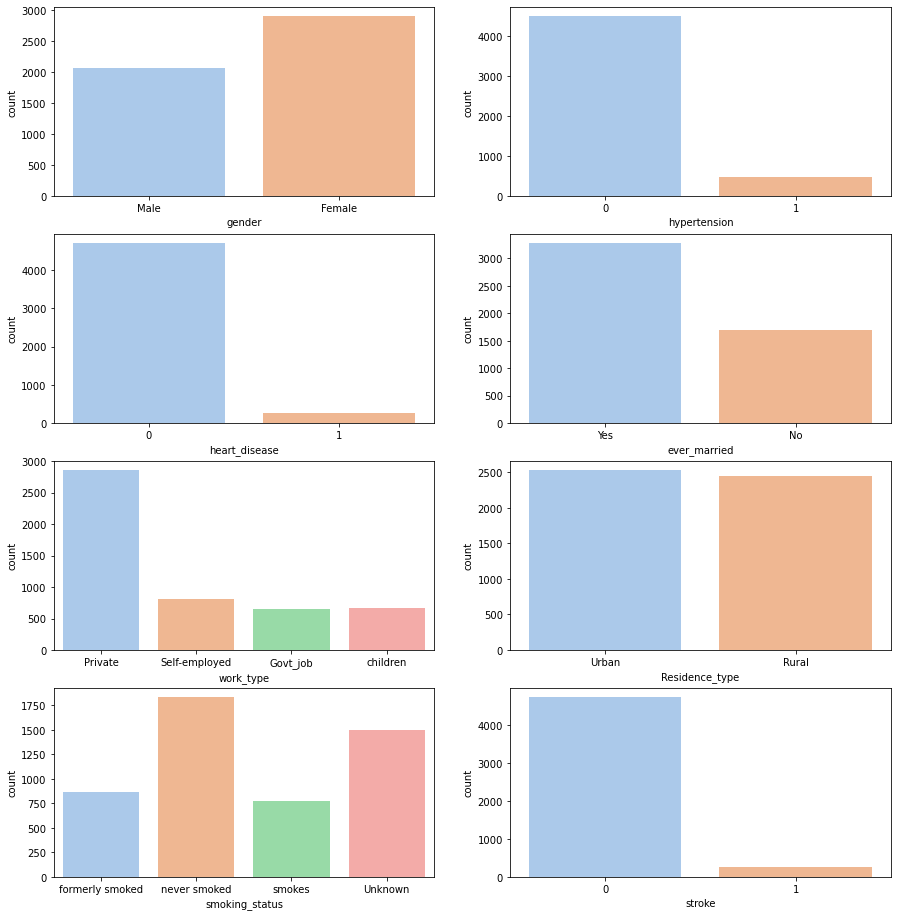

In [212]:

print('\033[1mVisualising Categorical Features:'.center(100))

sns.set_palette('pastel')

#Count of plot columns
n=2
plt.figure(figsize=[15,4*math.ceil(len(cat_feat)/n)])


for i in range (len(cat_feat)):
        plt.subplot(math.ceil(len(cat_feat)/n),n,i+1)  #subplot(nrows, ncols, index, **kwargs)
        sns.countplot(df_stroke[cat_feat[i]]) # Argument: Data 
plt.tight_layout
plt.show()

Text(0, 0.5, 'Body mass Index (bmi)')

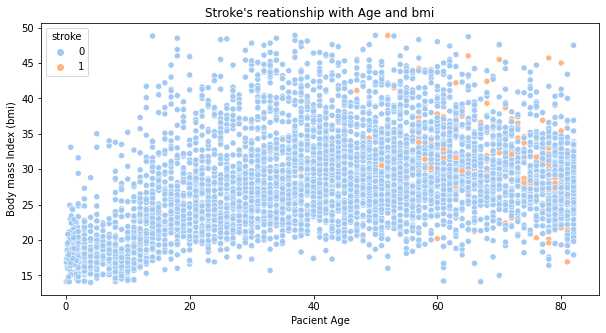

In [15]:
plt.subplots(figsize=(10,5))

sns.scatterplot(x=df_stroke['age'],y= df_stroke['bmi'],hue=df_stroke['stroke'], palette='pastel')

plt.title("Stroke's reationship with Age and bmi")
plt.xlabel('Pacient Age')
plt.ylabel('Body mass Index (bmi)')

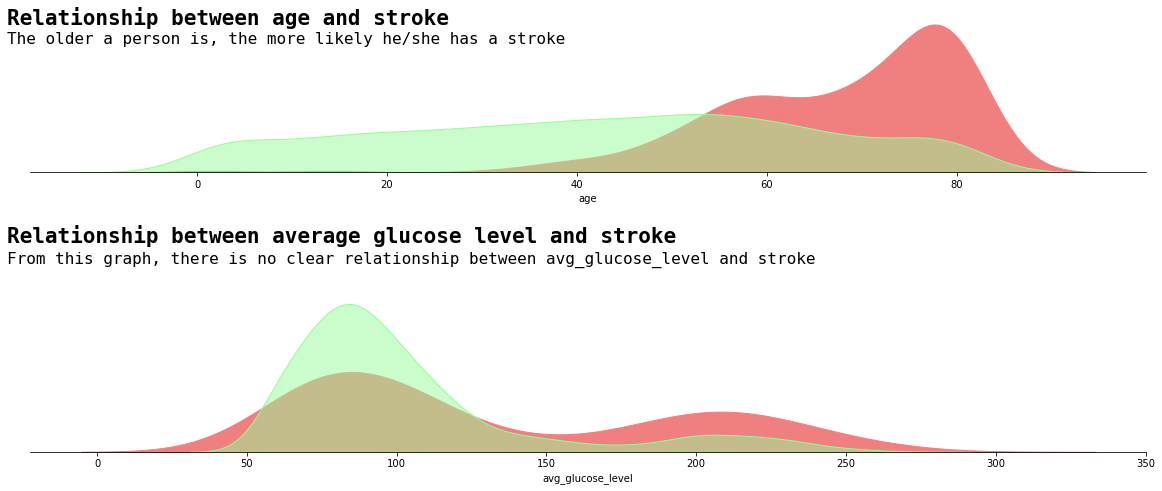

In [63]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(0,2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

#-20,0.04
ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.023,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.0207,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=df_stroke[df_stroke.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df_stroke[df_stroke.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=df_stroke[df_stroke.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df_stroke[df_stroke.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)

for i in range(2):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

## 3- Data Pre-processing